## Assignment
## Exercise meanshift
1. load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 `Petal` columns. Now we are left with a 2D feature space
2. get unique labels (Species column)
3. plot with a scatter plot each iris flower sample colored by label (3 different colors)
![image.png](attachment:image.png)
4. use: `MeanShift` and `estimate_bandwidth` from `sklearn.cluster` to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: `quantile` set it to `0.2` for best result)
5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function)
5. create a new scatter plot where each flower is colored according to cluster label
6. add a dot for the cluster centers
7. Compare the 2 plots (colored by actual labels vs. colored by cluster label)
8. Try changing the 'quantile' argument to 0.15 and see what happens to your cluster plot.

## Status



## Solution

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
flower_data = pd.read_csv('../data/iris_data.csv', decimal=',')
flower_data.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,I. setosa
1,4.9,3.0,1.4,0.2,I. setosa
2,4.7,3.2,1.3,0.2,I. setosa
3,4.6,3.1,1.5,0.2,I. setosa
4,5.0,3.6,1.4,0.2,I. setosa


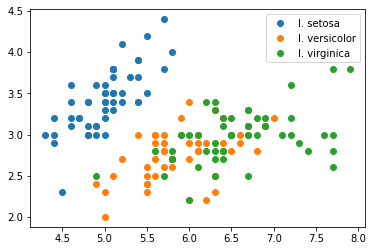

In [2]:
flower_data = flower_data.drop(columns=['Petal length', 'Petal width'])
groups = flower_data.groupby('Species')
#ax1 = fig.add_subplot(111)


for name, group in groups:
    plt.plot(group['Sepal length'], group['Sepal width'], linestyle='', marker='o', label = name)
plt.legend()


In [3]:
#flower_data.values


In [4]:
#Convert species to 0, 1 or 2
from sklearn import preprocessing
label_enc =preprocessing.LabelEncoder()
flower_data['Species'] = label_enc.fit_transform(flower_data['Species'].astype(str))
flower_data

,Sepal length,Sepal width,Species
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [5]:
from sklearn.cluster import MeanShift, estimate_bandwidth
def mean_shift(data, n_samples=150):
    bandwidth = estimate_bandwidth(flower_data, quantile=0.21, 
                                   n_samples=n_samples)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(flower_data)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)

    print('Number of estimated clusters : {}'.format(n_clusters))
    print('Number of estimated labels : {}'.format(labels_unique))
    print('Number of estimated cluster centers : {}'.format(cluster_centers))
    #print(bandwidth)
    return labels, cluster_centers, n_clusters


Number of estimated clusters : 3
Number of estimated labels : [0 1 2]
Number of estimated cluster centers : [[4.95777778 3.39333333 0.        ]
 [5.9        2.775      1.        ]
 [6.45945946 2.98378378 2.        ]]


Text(0.5, 1.0, 'Estimated number of clusters: 3')

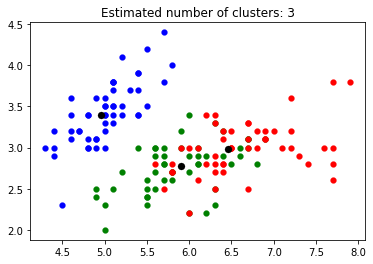

In [14]:

from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs

centers = [[4.95777778, 3.39333333], [5.9, 2.775], [6.45945946, 2.98378378]]


labels, cluster_centers, n_clusters = mean_shift(flower_data)
fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x, y = flower_data.values[my_members,0], flower_data.values[my_members,1]
    ax.scatter(x, y, c=col, linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))

